In [ ]:
!wget https://raw.githubusercontent.com/thecopy-cat/NLP_cw1/main/validation.jsonl
!wget https://raw.githubusercontent.com/thecopy-cat/NLP_cw1/main/train.jsonl

--2024-07-03 18:26:51--  https://raw.githubusercontent.com/thecopy-cat/NLP_cw1/main/validation.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5019008 (4.8M) [text/plain]
Saving to: ‘validation.jsonl’

validation.jsonl    100%[===================>]   4.79M  --.-KB/s    in 0.04s   

2024-07-03 18:26:51 (125 MB/s) - ‘validation.jsonl’ saved [5019008/5019008]

--2024-07-03 18:26:51--  https://raw.githubusercontent.com/thecopy-cat/NLP_cw1/main/train.jsonl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19144440 (18M) [text/plain

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the data
train_data = pd.read_json('train.jsonl', lines=True)
validation_data = pd.read_json('validation.jsonl', lines=True)

# Data Preprocessing
def preprocess_data(df):
    df['text'] = df['postText'].apply(lambda x: ' '.join(x))
    return df[['text', 'tags']]

train_data = preprocess_data(train_data)
validation_data = preprocess_data(validation_data)

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['tags'].apply(lambda x: 1 if 'passage' in x else 0)  # Converting into Binary form

X_val = vectorizer.transform(validation_data['text'])
y_val = validation_data['tags'].apply(lambda x: 1 if 'passage' in x else 0)

# Model Training & Testing

# 1 Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Report:\n", classification_report(y_val, y_pred_lr))

# 2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Report:\n", classification_report(y_val, y_pred_rf))

# 3 Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
print("Support Vector Machine Report:\n", classification_report(y_val, y_pred_svm))
classification_report


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76       478
           1       0.66      0.36      0.47       322

    accuracy                           0.67       800
   macro avg       0.67      0.62      0.61       800
weighted avg       0.67      0.67      0.64       800

Random Forest Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75       478
           1       0.64      0.44      0.52       322

    accuracy                           0.67       800
   macro avg       0.66      0.64      0.64       800
weighted avg       0.67      0.67      0.66       800

Support Vector Machine Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       478
           1       0.62      0.49      0.55       322

    accuracy                           0.68       800
   macro avg       0.66      0.64      0.65 

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

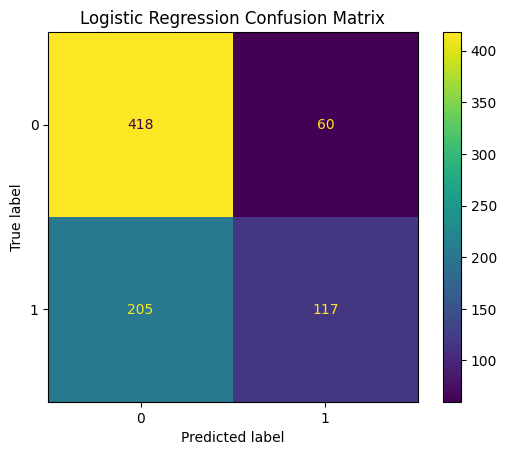

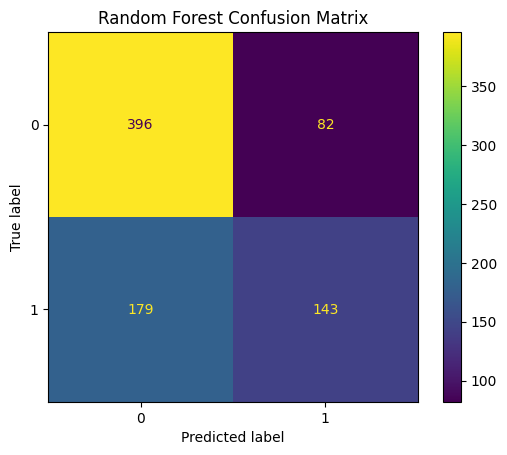

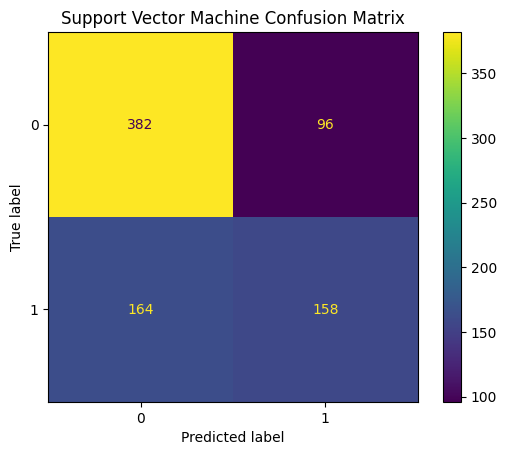

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_lr)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Support Vector Machine Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_svm)
plt.title("Support Vector Machine Confusion Matrix")
plt.show()